In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier

# 2. **Data Exploration** 


In [3]:
#Load Data
df = pd.read_csv("oral_cancer_prediction/data/colorectal_cancer_dataset.csv")
df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [4]:
print(df.columns.tolist())

['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage', 'Tumor_Size_mm', 'Family_History', 'Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity', 'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation', 'Screening_History', 'Early_Detection', 'Treatment_Type', 'Survival_5_years', 'Mortality', 'Healthcare_Costs', 'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural', 'Economic_Classification', 'Healthcare_Access', 'Insurance_Status', 'Survival_Prediction']


In [5]:
# Data preprocessing
# Check for missing values
print(df.isnull().sum())

Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [7]:
 # Summary statistics
df.describe()


,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


# Data Preprocessing 



In [8]:
# Check for duplicate rows
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [9]:
# Encode target variable only
target_col = 'Survival_5_years'
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])

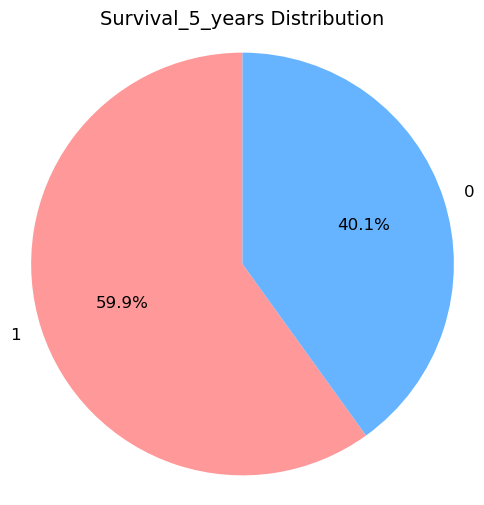

Survival_5_years
1    100387
0     67110
Name: count, dtype: int64

In [10]:
# Visualize class distribution

cancer_counts = df['Survival_5_years'].value_counts()
labels = cancer_counts.index
sizes = cancer_counts.values

# Pie chart
plt.figure(figsize=(6, 6))
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12})
plt.title('Survival_5_years Distribution', fontsize=14)
plt.axis('equal')
plt.show()
df['Survival_5_years'].value_counts()  # 0: No, 1: Yes

In [11]:
label_cols = [
    'Gender', 'Family_History',
    'Smoking_History', 'Alcohol_Consumption', 'Diabetes',
    'Inflammatory_Bowel_Disease', 'Genetic_Mutation', 'Early_Detection', 'Mortality', 'Urban_or_Rural','Insurance_Status', 'Economic_Classification'
]

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
df = df.drop(columns=['Survival_Prediction'])

In [13]:
# Strip whitespace from each of the three columns
for col in ['Healthcare_Access', 'Physical_Activity', 'Diet_Risk']:
    df[col] = df[col].str.strip()

# Then use the encoder
ordinal_mapping = [['Low', 'Moderate', 'High']]
enc = OrdinalEncoder(categories=ordinal_mapping * 3)  # Repeat mapping for each column
cols = ['Healthcare_Access', 'Physical_Activity', 'Diet_Risk']
df[cols] = enc.fit_transform(df[cols])

In [14]:
categorical_columns = ['Cancer_Stage', 'Country', 'Obesity_BMI', 'Screening_History', 'Treatment_Type']

encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])
print("Number of features:", df.shape[1])

Number of features: 27


# Feature Selection 


In [15]:
# Assuming your target column is named 'Survival_5_years'
correlations = df.corr()['Survival_5_years'].sort_values(ascending=False)
print(correlations)

Survival_5_years              1.000000
Mortality                     0.003450
Urban_or_Rural                0.003122
Country                       0.002794
Incidence_Rate_per_100K       0.002456
Obesity_BMI                   0.002324
Tumor_Size_mm                 0.002017
Patient_ID                    0.001553
Diabetes                      0.001360
Smoking_History               0.001295
Gender                        0.001001
Genetic_Mutation              0.000333
Healthcare_Costs             -0.000037
Cancer_Stage                 -0.000137
Inflammatory_Bowel_Disease   -0.000140
Diet_Risk                    -0.000473
Physical_Activity            -0.000584
Economic_Classification      -0.001378
Early_Detection              -0.001477
Age                          -0.001654
Treatment_Type               -0.002071
Screening_History            -0.002256
Healthcare_Access            -0.002377
Mortality_Rate_per_100K      -0.002398
Insurance_Status             -0.003282
Alcohol_Consumption      

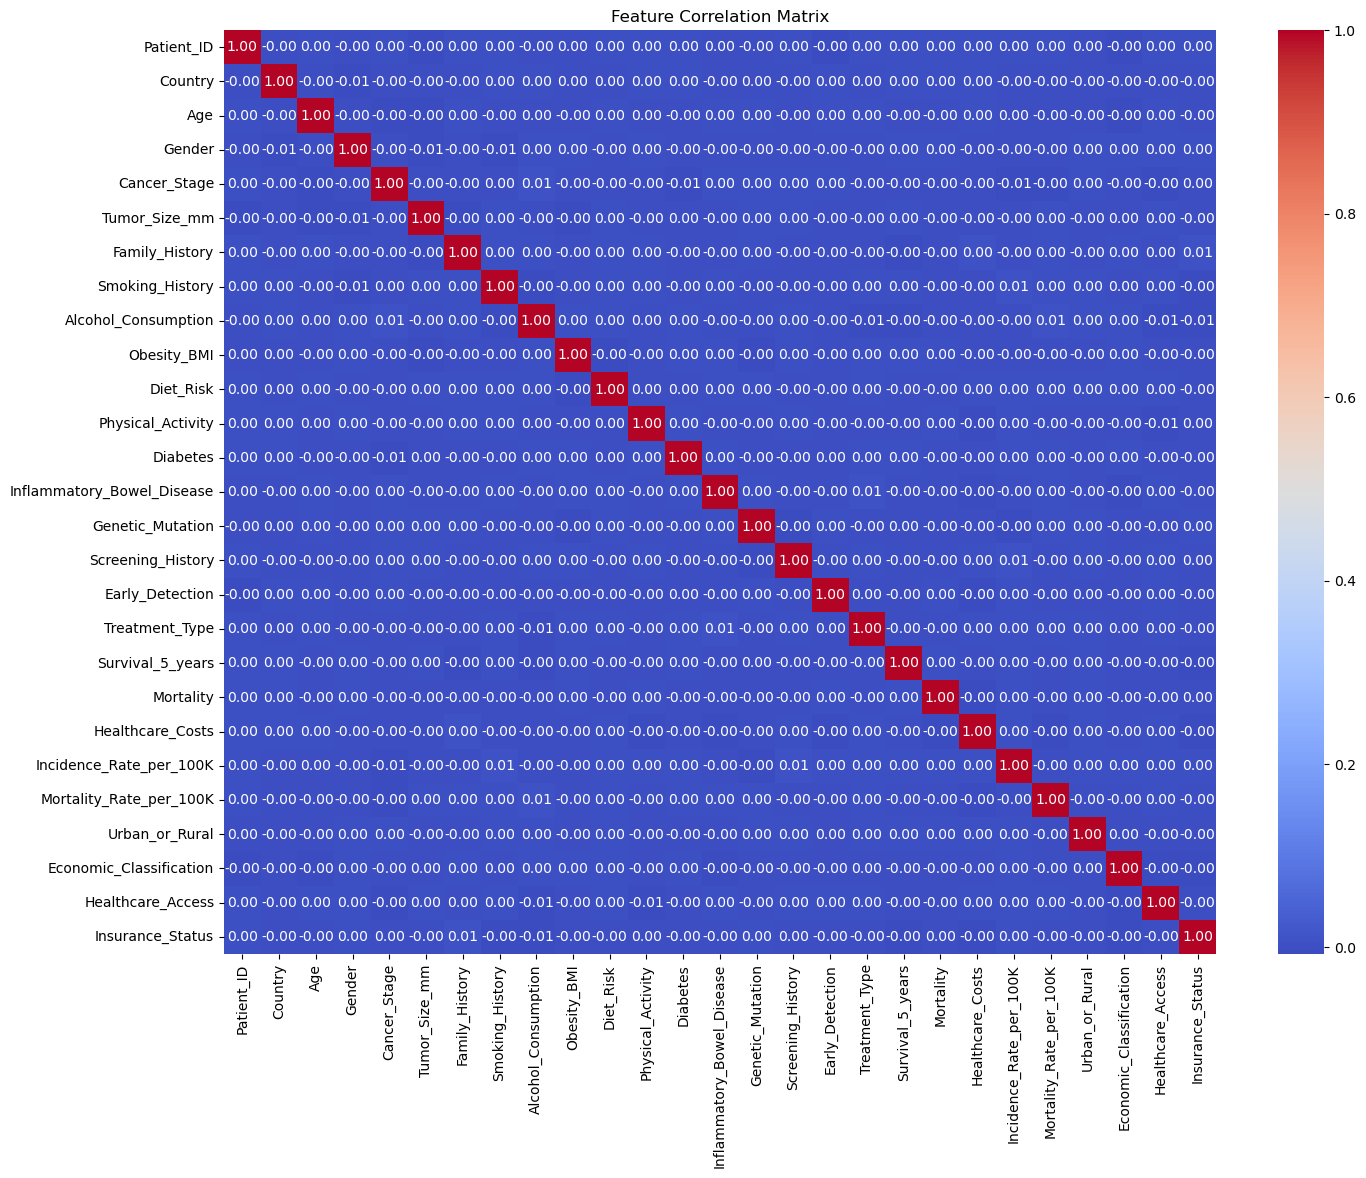

In [16]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [17]:
# Select features with absolute correlation above a threshold
corr = df.corr()['Survival_5_years'].abs().sort_values(ascending=False)
selected_features = corr[corr > 0.002].index.tolist()
#selected_features.remove('Survival_5_years')  # Remove the target itself
print(selected_features)
print(len(selected_features))  # Print number of features



['Survival_5_years', 'Family_History', 'Alcohol_Consumption', 'Mortality', 'Insurance_Status', 'Urban_or_Rural', 'Country', 'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Healthcare_Access', 'Obesity_BMI', 'Screening_History', 'Treatment_Type', 'Tumor_Size_mm']
14


In [18]:
# feature engineering 
# Bin Tumor Size
if 'Tumor_Size_mm' in df.columns:
    df['Tumor_Size_Category'] = pd.cut(df['Tumor_Size_mm'], bins=[0,20,40,100], labels=['small','medium','large'])
# Strip whitespace from Tumor_Size_Category
df['Tumor_Size_Category'] = df['Tumor_Size_Category'].str.strip()

# Ordinal encoding for Tumor_Size_Category
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['small', 'medium', 'large']])
df[['Tumor_Size_Category']] = enc.fit_transform(df[['Tumor_Size_Category']])

In [19]:
# Outlier detection by Interquartile Range (IQR)
outlier_features = []
outlier_mask = np.zeros(len(df), dtype=bool)
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    is_outlier = (df[col] < lower_bound) | (df[col] > upper_bound)
    if is_outlier.any():
        outlier_features.append(col)
    outlier_mask |= is_outlier
print("Features with outliers:", outlier_features)
print("Number of rows with at least one outlier:", outlier_mask.sum())


Features with outliers: ['Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation']
Number of rows with at least one outlier: 64870


In [20]:
#Remove rows with outliers in these features
features_with_outliers = ['Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation']
df_clean = df.copy()
for col in features_with_outliers:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
print(df_clean[selected_features].shape)

(102627, 14)


# Visualization 


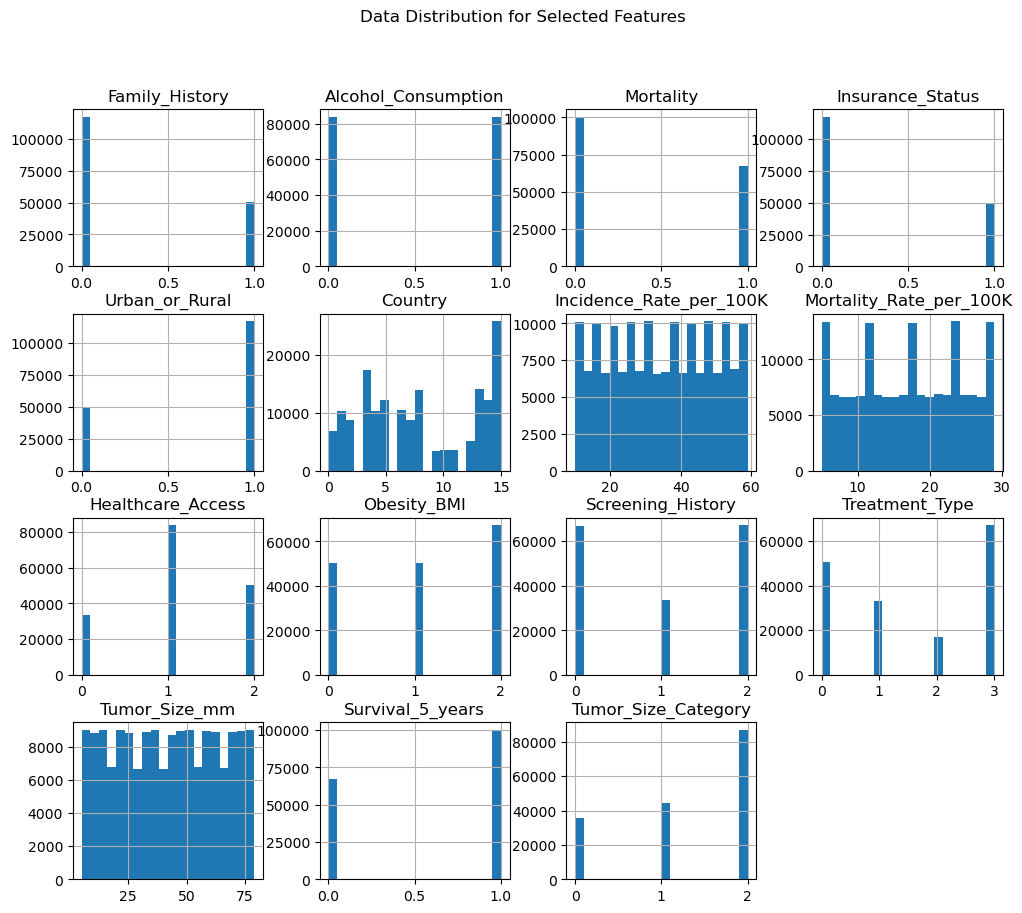

In [21]:
# Visualizing data distributions for selected features
selected_features = ['Family_History', 'Alcohol_Consumption', 'Mortality', 'Insurance_Status', 
                     'Urban_or_Rural', 'Country', 'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 
                     'Healthcare_Access', 'Obesity_BMI', 'Screening_History', 'Treatment_Type', 'Tumor_Size_mm', 'Survival_5_years',
                    # New features: 
                     'Tumor_Size_Category']

df[selected_features].hist(bins=20, figsize=(12, 10))
plt.suptitle('Data Distribution for Selected Features')
plt.show()

In [22]:
# Define features and target variable
X = df_clean[selected_features].drop(columns=["Survival_5_years"])  # Features
y = df_clean[selected_features]["Survival_5_years"]  # Target

In [23]:
X

,Family_History,Alcohol_Consumption,Mortality,Insurance_Status,Urban_or_Rural,Country,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Healthcare_Access,Obesity_BMI,Screening_History,Treatment_Type,Tumor_Size_mm,Tumor_Size_Category
0,0,1,0,0,1,14,50,5,1.0,2,2,1,69,2.0
1,0,0,0,1,1,14,37,25,2.0,2,2,0,33,1.0
3,0,0,0,0,1,15,45,11,1.0,1,2,3,14,0.0
6,0,0,1,1,1,2,51,6,2.0,2,1,0,59,2.0
8,1,0,1,0,0,15,23,11,0.0,2,2,2,48,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167487,1,1,1,0,1,15,30,13,2.0,2,2,3,53,2.0
167488,1,1,1,0,0,13,21,19,2.0,1,1,3,46,2.0
167491,1,1,0,0,1,14,13,29,2.0,1,2,0,49,2.0
167492,0,0,1,0,0,15,57,13,1.0,2,1,1,49,2.0


In [24]:
y

0         1
1         1
3         1
6         1
8         0
         ..
167487    1
167488    1
167491    0
167492    0
167493    1
Name: Survival_5_years, Length: 102627, dtype: int32

# Modeling and Evaluation 

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
df_clean[selected_features].to_csv('cleaned_selected_features.csv', index=False)

In [27]:
# Handle imbalance 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [52]:
print(y_train.value_counts())
# After resampling
print(y_resampled.value_counts())

Survival_5_years
1    49168
0    32933
Name: count, dtype: int64
Survival_5_years
1    49168
0    49168
Name: count, dtype: int64


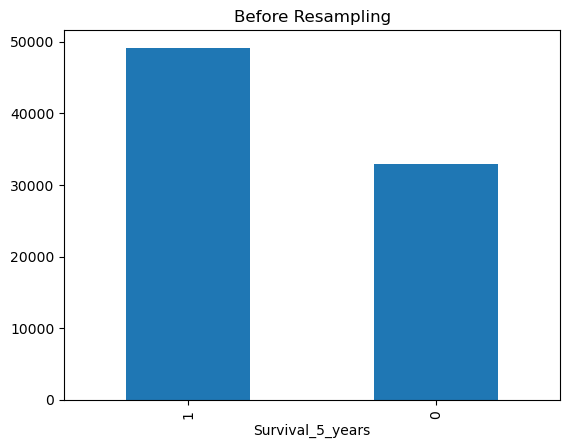

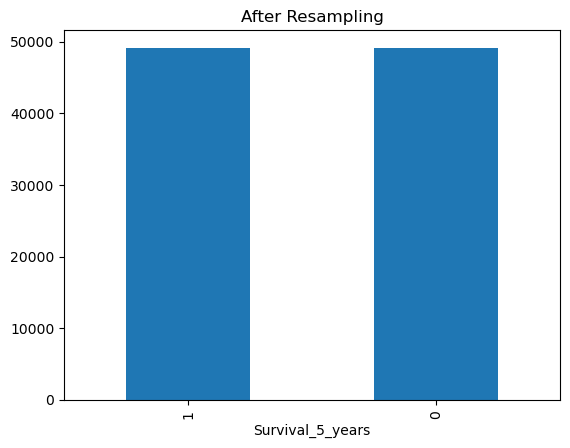

In [53]:
import matplotlib.pyplot as plt
y_train.value_counts().plot(kind='bar', title='Before Resampling')
plt.show()
y_resampled.value_counts().plot(kind='bar', title='After Resampling')
plt.show()

Accuracy: 0.4962


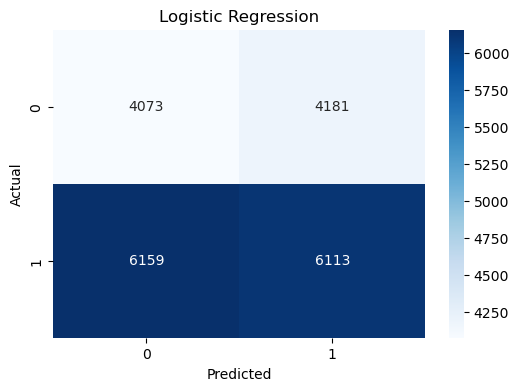

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.49      0.44      8254
           1       0.59      0.50      0.54     12272

    accuracy                           0.50     20526
   macro avg       0.50      0.50      0.49     20526
weighted avg       0.52      0.50      0.50     20526



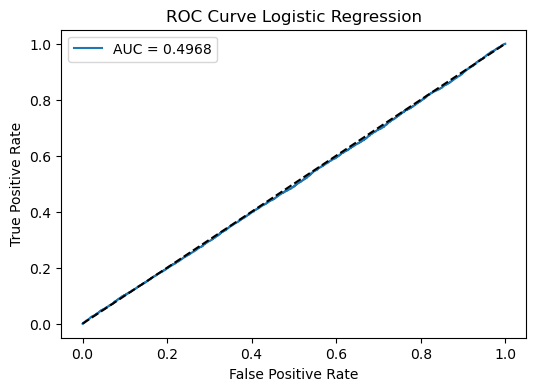

Cross-Validation Accuracy: 0.5054 ± 0.0024


In [54]:
# Train Logistic Regression
clf = LogisticRegression( max_iter=1000, random_state=42)
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend()
plt.show()
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter=1000, random_state=42)
scores = cross_val_score(clf, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression 

- Accuracy: 0.4962 (close to random guessing)
- Cross-Validation Accuracy: 0.5054 ± 0.0024 (very stable, but weak)
- Class 0: Precision 0.40, Recall 0.49, F1 0.44
- Class 1: Precision 0.59, Recall 0.50, F1 0.54
Interpretation:
- The model is not learning strong patterns and is performing at chance level.
- Slight bias toward class 1, but both classes have low recall and F1-scores.
- The low standard deviation in CV accuracy means the model is consistently weak across folds.

K=1: Accuracy=0.5181, AUC=0.4986
K=2: Accuracy=0.4738, AUC=0.4991
K=3: Accuracy=0.5265, AUC=0.5002
K=4: Accuracy=0.4956, AUC=0.5025
K=5: Accuracy=0.5375, AUC=0.4979
K=6: Accuracy=0.5050, AUC=0.4977
K=7: Accuracy=0.5456, AUC=0.5027
K=8: Accuracy=0.5212, AUC=0.5017
K=9: Accuracy=0.5468, AUC=0.5036
K=10: Accuracy=0.5300, AUC=0.5038
K=11: Accuracy=0.5527, AUC=0.5042
K=12: Accuracy=0.5355, AUC=0.5057
K=13: Accuracy=0.5569, AUC=0.5046
K=14: Accuracy=0.5374, AUC=0.5034
K=15: Accuracy=0.5574, AUC=0.5041
K=16: Accuracy=0.5412, AUC=0.5043
K=17: Accuracy=0.5604, AUC=0.5044
K=18: Accuracy=0.5473, AUC=0.5035
K=19: Accuracy=0.5639, AUC=0.5029
K=20: Accuracy=0.5525, AUC=0.5032


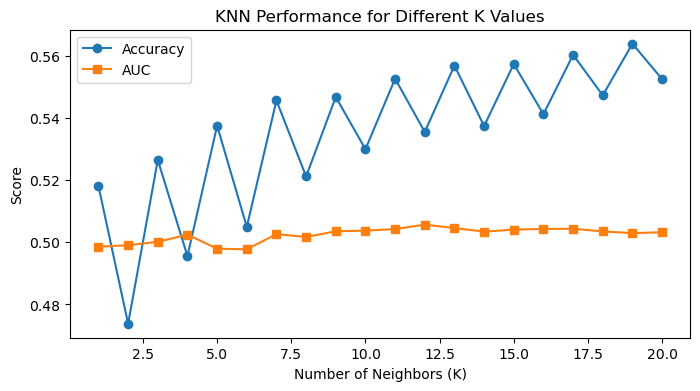

In [209]:
k_values = range(1, 21)
accuracies = []
aucs = []

for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracies.append(acc)
    aucs.append(auc)
    print(f"K={k}: Accuracy={acc:.4f}, AUC={auc:.4f}")

plt.figure(figsize=(8,4))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.plot(k_values, aucs, marker='s', label='AUC')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.title('KNN Performance for Different K Values')
plt.legend()
plt.show()

#KNN
- Accuracy measures the proportion of correct predictions. It ranges from about 0.47 to 0.56, meaning the model is only slightly better than random guessing (which would be 0.5 for a balanced binary classification problem).
- AUC values are all very close to 0.5, which indicates the model has little to no ability to distinguish between the classes (an AUC of 0.5 means random performance).
- As K increases, accuracy fluctuates but does not show a strong upward or downward trend, and AUC remains nearly constant.
Interpretation:
- The KNN model is not performing well on this dataset, regardless of the value of K. Both accuracy and AUC are close to what would be expected by chance.

Accuracy: 0.5639


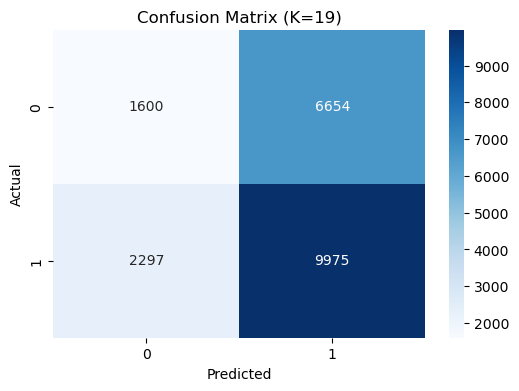

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.19      0.26      8254
           1       0.60      0.81      0.69     12272

    accuracy                           0.56     20526
   macro avg       0.51      0.50      0.48     20526
weighted avg       0.52      0.56      0.52     20526



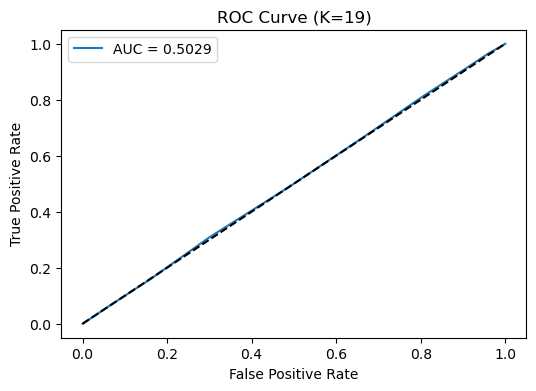

KNN Cross-Validation Accuracy: 0.5629 ± 0.0016


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=19)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K=19)')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (K=19)')
plt.legend()
plt.show()

# Cross-Validation
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"KNN Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

#k19
- Class 0 (Negative class):
  - Precision: 0.41 (when the model predicts 0, it's correct 41% of the time)
  - Recall: 0.19 (it only finds 19% of all actual class 0 cases)
  - F1-score: 0.26 (harmonic mean of precision and recall, low due to poor recall)
- Class 1 (Positive class):
  - Precision: 0.60 (when the model predicts 1, it's correct 60% of the time)
  - Recall: 0.81 (it finds 81% of all actual class 1 cases)
  - F1-score: 0.69 (better balance between precision and recall)
- Overall accuracy: 0.56 (model correctly predicts 56% of all cases)
- Macro avg: Averages metrics for both classes equally, showing overall poor balance (all around 0.5)
- Weighted avg: Takes class imbalance into account, but still low (all around 0.5)
- AUC: 0.50 (the model's ability to distinguish between classes is no better than random guessing)
Summary:
- The model is heavily biased toward predicting class 1, missing most class 0 cases (low recall for class 0).
- The overall accuracy and AUC are both low, indicating poor model performance.
- This suggests the model is not suitable for this dataset

Accuracy: 0.5604


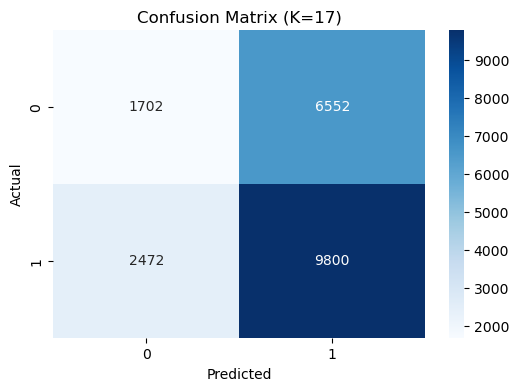

KNN Cross-Validation Accuracy: 0.5603 ± 0.0013


In [32]:
# Train KNN with K=17
clf = KNeighborsClassifier(n_neighbors=17)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K=17)')
plt.show()
# Cross-Validation
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"KNN Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Accuracy: 0.5569


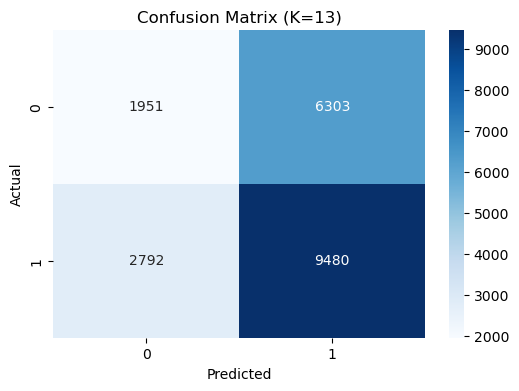

KNN Cross-Validation Accuracy: 0.5532 ± 0.0024


In [33]:
# Train KNN with K=13
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K=13)')
plt.show()
# Cross-Validation
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"KNN Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Accuracy: 0.5574


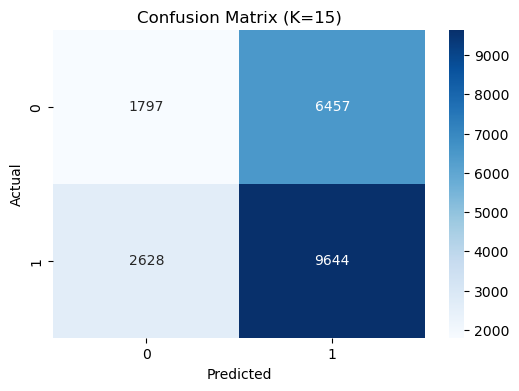

In [213]:
# Train KNN with K=15
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K=15)')
plt.show()

Accuracy: 0.5527


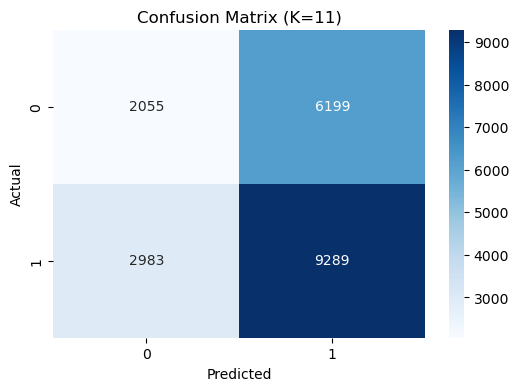

KNN Cross-Validation Accuracy: 0.5509 ± 0.0014


In [34]:
# Train KNN with K=11
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K=11)')
plt.show()
# Cross-Validation
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"KNN Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Accuracy: 0.5604


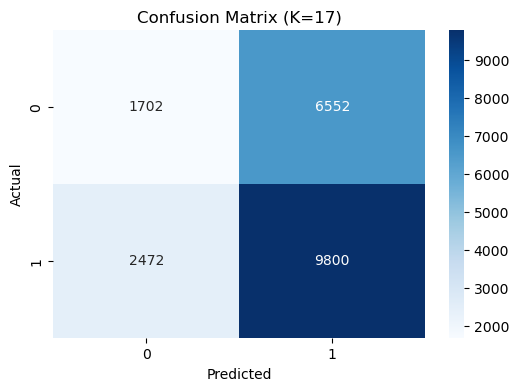

KNN Cross-Validation Accuracy: 0.5603 ± 0.0013


In [35]:
# Train KNN with K=17
clf = KNeighborsClassifier(n_neighbors=17)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K=17)')
plt.show()
# Cross-Validation
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"KNN Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Accuracy: 0.5084


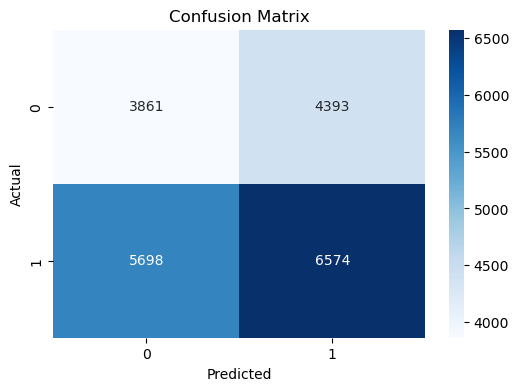

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.47      0.43      8254
           1       0.60      0.54      0.57     12272

    accuracy                           0.51     20526
   macro avg       0.50      0.50      0.50     20526
weighted avg       0.52      0.51      0.51     20526



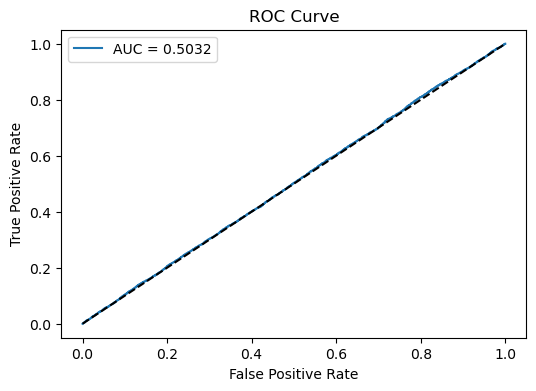

Stacking Classifier Cross-Validation Accuracy: 0.5390 ± 0.0210


In [36]:
#STACKING classifier (Using LR, KNN, NB)

from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define base models
estimators = [
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=17)),
    ('nb', GaussianNB())
]

# Define stacking ensemble
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    passthrough=True
)

# Train on resampled data
stacking_clf.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test_scaled)
y_pred_proba = stacking_clf.predict_proba(X_test_scaled)[:,1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    stacking_clf,
    X_resampled,
    y_resampled,
    cv=5,
    scoring='accuracy'
)
print(f"Stacking Classifier Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Stacking Classifier
- The model is not capturing strong patterns and performs only marginally better than random.
- Slight bias toward class 1, but both classes have low recall and F1-scores.
- The cross-validation accuracy is a bit higher than test accuracy, but overall performance is weak.

Random Forest Accuracy: 0.5690831140991913
              precision    recall  f1-score   support

           0       0.40      0.15      0.22      8254
           1       0.60      0.85      0.70     12272

    accuracy                           0.57     20526
   macro avg       0.50      0.50      0.46     20526
weighted avg       0.52      0.57      0.51     20526



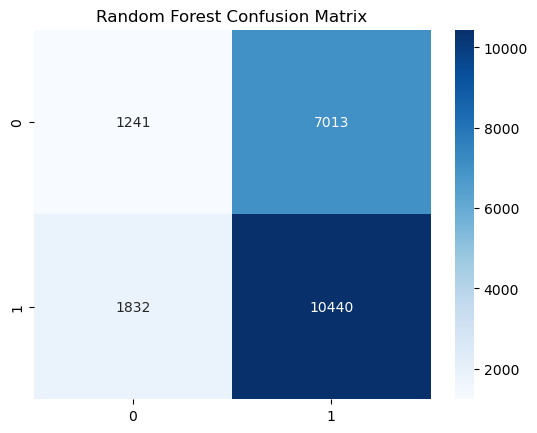

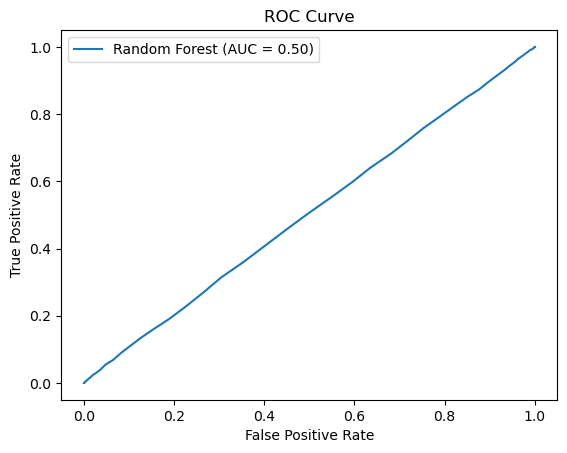

Random Forest Cross-Validation Accuracy: 0.5706 ± 0.0020


In [37]:
# Train a Random Forest classifier 
clf = RandomForestClassifier( random_state=42)
clf.fit(X_resampled, y_resampled)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_rf)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Random Forest
- Test Set Accuracy: 0.5691 (about 57% of predictions are correct)
- Cross-Validation Accuracy: 0.5706 ± 0.0020 (average accuracy across 5 folds, very low standard deviation)
Interpretation:
- The model is much better at predicting class 1 than class 0 (high recall for class 1, low for class 0).
- Cross-validation accuracy is almost identical to test accuracy, indicating stable and consistent performance across different data splits.
- The low standard deviation (±0.0020) means the model's performance is very consistent.

Accuracy: 0.500243593491182
              precision    recall  f1-score   support

           0       0.40      0.49      0.44      8254
           1       0.60      0.51      0.55     12272

    accuracy                           0.50     20526
   macro avg       0.50      0.50      0.49     20526
weighted avg       0.52      0.50      0.51     20526



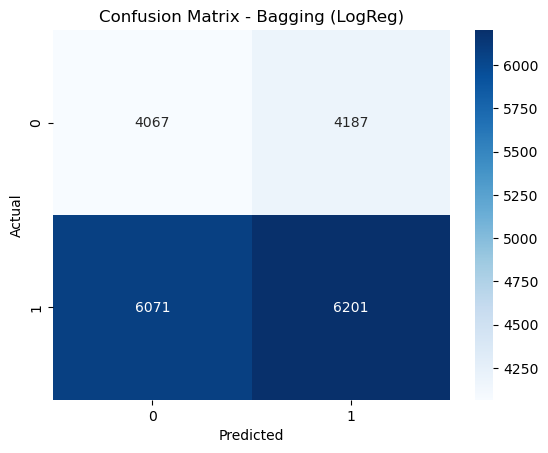

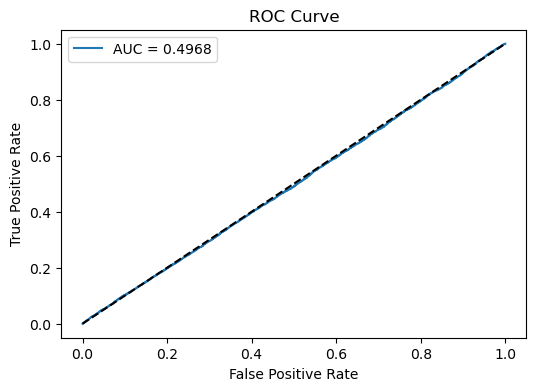

Bagging (LogReg) Cross-Validation Accuracy: 0.5041 ± 0.0047


In [55]:
#Bagging – LogReg
from sklearn.ensemble import BaggingClassifier

# Define the Bagging model with Logistic Regression as base estimator
bagging_logreg = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    n_estimators=10,
    random_state=42
)

# Fit the model
bagging_logreg.fit(X_train, y_train)

# Predict
y_pred = bagging_logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Bagging (LogReg)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

cv_scores = cross_val_score(bagging_logreg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Bagging (LogReg) Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Bagging model with Logistic Regression as the base estimator:

- Accuracy: 0.5002 (random guessing)
- Cross-Validation Accuracy: 0.5041 ± 0.0047 (very stable, but weak)
- Class 0: Precision 0.40, Recall 0.49, F1 0.44
- Class 1: Precision 0.60, Recall 0.51, F1 0.55
Interpretation:
- Slight bias toward class 1, but both classes have low recall and F1-scores.
- Bagging does not improve performance over a single Logistic Regression in this case.


max_depth=3
Accuracy: 0.5358
              precision    recall  f1-score   support

           0       0.39      0.29      0.33      8254
           1       0.59      0.70      0.64     12272

    accuracy                           0.54     20526
   macro avg       0.49      0.50      0.49     20526
weighted avg       0.51      0.54      0.52     20526



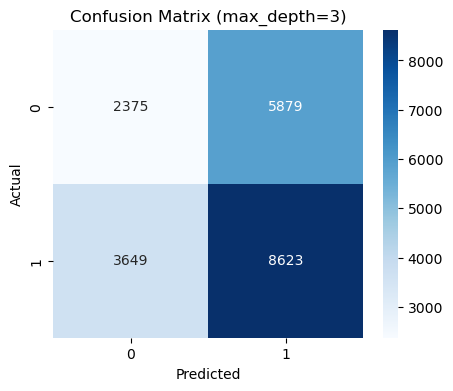

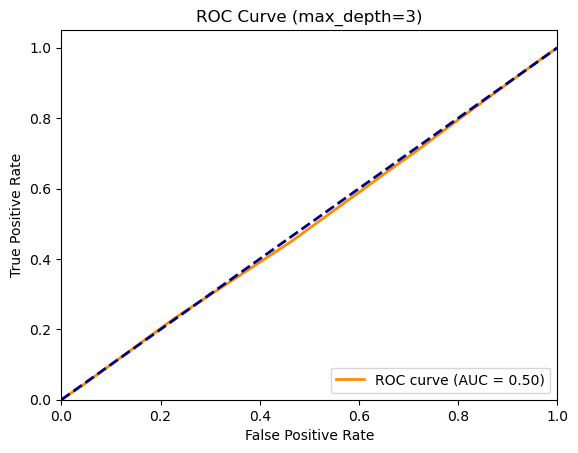


max_depth=5
Accuracy: 0.4996
              precision    recall  f1-score   support

           0       0.40      0.48      0.43      8254
           1       0.59      0.52      0.55     12272

    accuracy                           0.50     20526
   macro avg       0.50      0.50      0.49     20526
weighted avg       0.52      0.50      0.50     20526



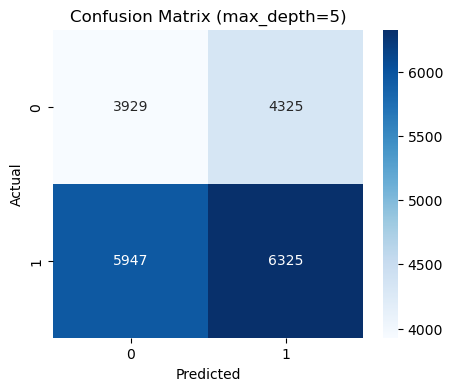

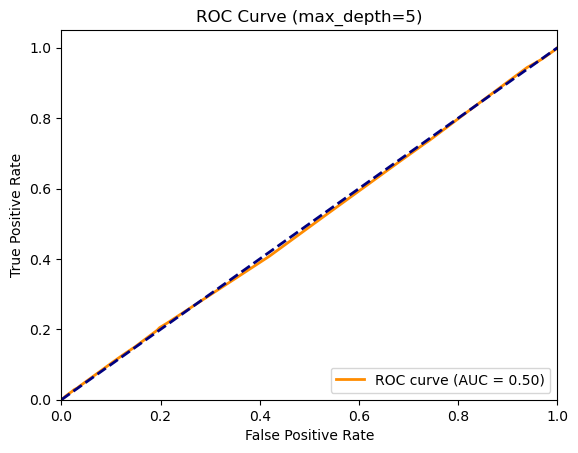


max_depth=10
Accuracy: 0.5109
              precision    recall  f1-score   support

           0       0.41      0.50      0.45      8254
           1       0.61      0.52      0.56     12272

    accuracy                           0.51     20526
   macro avg       0.51      0.51      0.51     20526
weighted avg       0.53      0.51      0.52     20526



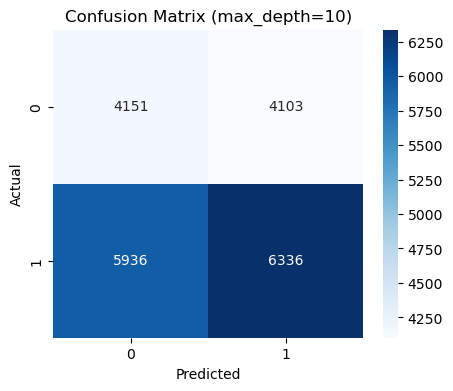

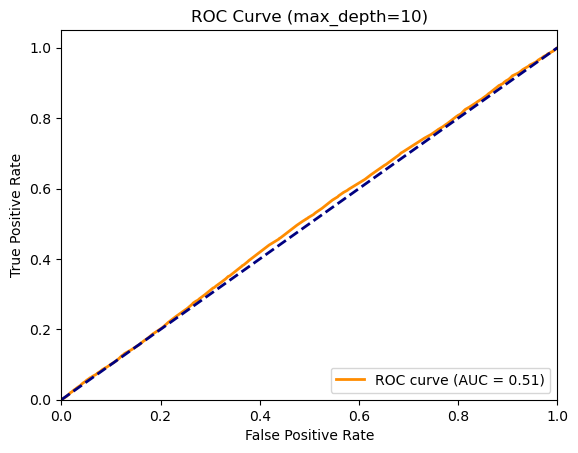


max_depth=None
Accuracy: 0.5252
              precision    recall  f1-score   support

           0       0.41      0.41      0.41      8254
           1       0.60      0.61      0.60     12272

    accuracy                           0.53     20526
   macro avg       0.51      0.51      0.51     20526
weighted avg       0.52      0.53      0.52     20526



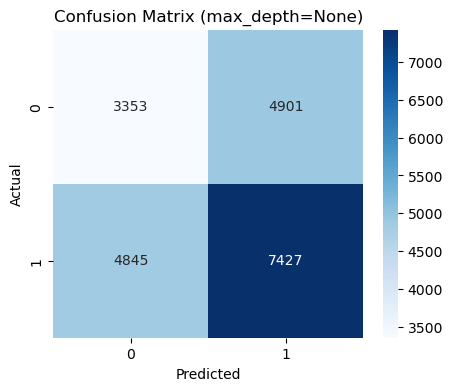

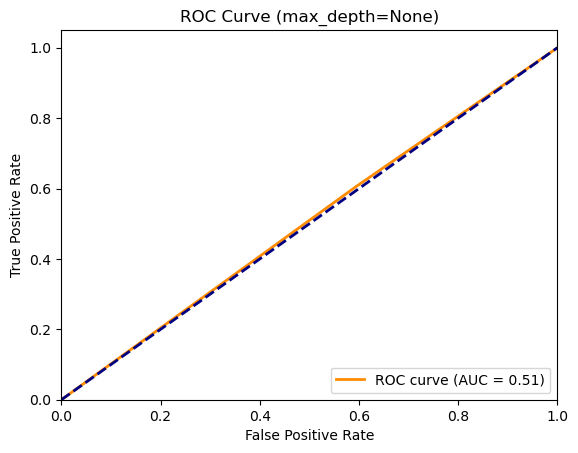

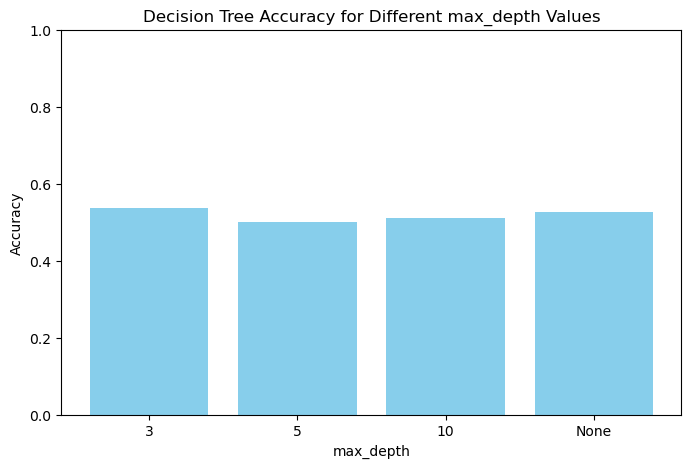


max_depth=None
Accuracy: 0.5252
Cross-Validation Accuracy: 0.5212 ± 0.0041


In [43]:
#DecisionTreeClassifier
max_depths = [3, 5, 10, None]
accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, class_weight='balanced', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"\nmax_depth={depth}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=1))
    # Confusion Matrix with heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (max_depth={depth})')
    plt.show()
    # ROC Curve and AUC
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve (max_depth={depth})')
        plt.legend(loc="lower right")
        plt.show()

# Visualization of accuracy
labels = ['3', '5', '10', 'None']
plt.figure(figsize=(8,5))
plt.bar(labels, accuracies, color='skyblue')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy for Different max_depth Values')
plt.ylim(0, 1)
plt.show()

# Cross-validation
cv_means = []
cv_stds = []
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
cv_means.append(cv_scores.mean())
cv_stds.append(cv_scores.std())
print(f"\nmax_depth={depth}")
print(f"Accuracy: {acc:.4f}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


# DecisionTreeClassifier with different max_depth values:
- max_depth=3: Accuracy 0.5358, favors class 1 (recall 0.70), but poor for class 0 (recall 0.29).
- max_depth=5: Accuracy drops to 0.4996 (random), both classes perform poorly.
- max_depth=10: Accuracy 0.5109, slight improvement, but still weak and biased toward class 1.
- max_depth=None: Accuracy 0.5252, more balanced recall (0.41 for class 0, 0.61 for class 1), but overall weak, AUC: 0.51 (barely above random guessing).
Interpretation:
- The model struggles to generalize, regardless of tree depth.
- Consistent bias toward class 1, especially at lower depths.
- No setting yields strong or balanced performance.

Accuracy: 0.5110


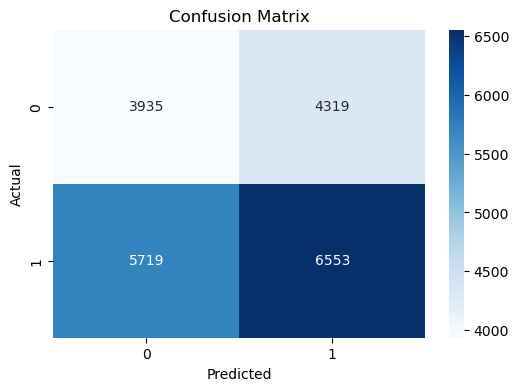

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.48      0.44      8254
           1       0.60      0.53      0.57     12272

    accuracy                           0.51     20526
   macro avg       0.51      0.51      0.50     20526
weighted avg       0.52      0.51      0.52     20526



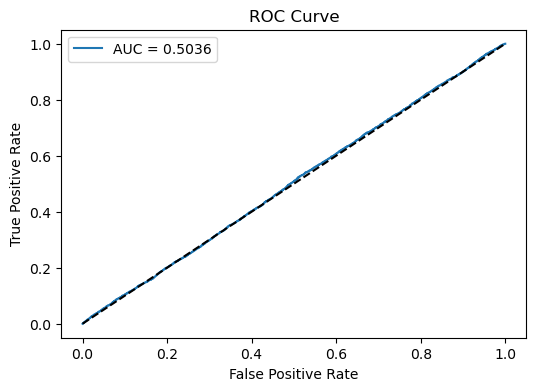

XGBoost Cross-Validation Accuracy: 0.5089 ± 0.0037


In [40]:
#XGBOOST
import xgboost as xgb

# Calculate scale_pos_weight for class imbalance
y_train_counts = y_train.value_counts()
scale_pos_weight = y_train_counts[0] / y_train_counts[1]
clf = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"XGBoost Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

XGBoost results:
- Accuracy: 0.5110 (close to random guessing)
- Cross-Validation Accuracy: 0.5089 ± 0.0037 (very stable, but still weak)
- Class 0: Precision 0.41, Recall 0.48, F1 0.44
- Class 1: Precision 0.60, Recall 0.53, F1 0.57
Interpretation:
- The model is not learning strong patterns and performs only slightly better than random.
- Both classes have low recall and F1-scores, with a slight bias toward class 1.
- The low standard deviation in CV accuracy means the model is consistently weak across folds.

Accuracy: 0.4996
              precision    recall  f1-score   support

           0       0.40      0.48      0.43      8254
           1       0.59      0.52      0.55     12272

    accuracy                           0.50     20526
   macro avg       0.50      0.50      0.49     20526
weighted avg       0.52      0.50      0.50     20526



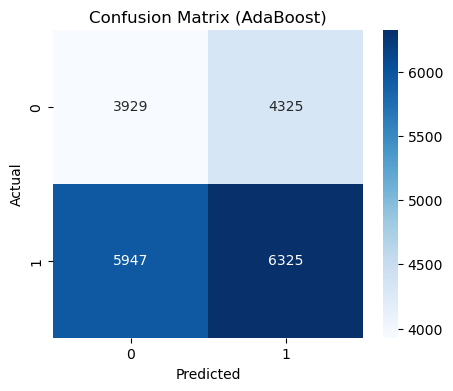

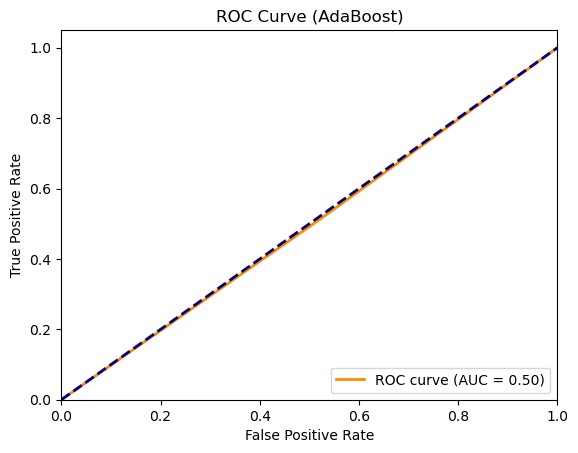

Cross-Validation Accuracy: 0.5202 ± 0.0137


In [44]:
# Boosting – AdaBoost

# Define base estimator
base_estimator = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
# AdaBoost with Decision Tree base estimator
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, algorithm='SAMME', random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification report
print(classification_report(y_test, y_pred, zero_division=1))

# Confusion matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()

# ROC Curve and AUC
if hasattr(ada, "predict_proba"):
    y_score = ada.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (AdaBoost)')
    plt.legend(loc="lower right")
    plt.show()

# Cross-validation
cv_scores = cross_val_score(ada, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# AdaBoost with Decision Tree base estimator
- Accuracy: 0.4996 (almost random guessing)
- AUC: 0.50 (no discrimination between classes)
- Cross-Validation Accuracy: 0.5202 ± 0.0137 (slightly above random, but still weak)
- Class 0: Precision 0.40, Recall 0.48, F1 0.43
- Class 1: Precision 0.59, Recall 0.52, F1 0.55

- The model is not learning meaningful patterns from the data,

C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:19:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Hard Voting Accuracy: 0.5548572542141674
              precision    recall  f1-score   support

           0       0.41      0.24      0.30      8254
           1       0.60      0.77      0.67     12272

    accuracy                           0.55     20526
   macro avg       0.50      0.50      0.49     20526
weighted avg       0.52      0.55      0.52     20526



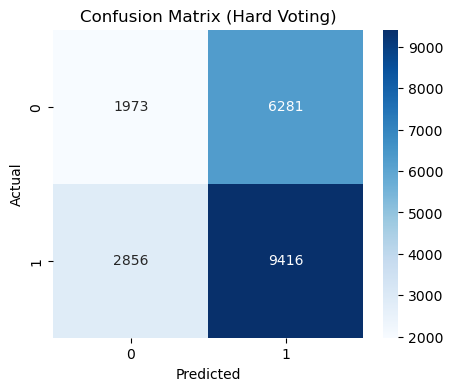

C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:22:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:25:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:28:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:30:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not

Hard Voting Cross-Validation Accuracy: 0.6038 ± 0.1125


C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:35:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Soft Voting Accuracy: 0.5559290655753678
              precision    recall  f1-score   support

           0       0.41      0.22      0.29      8254
           1       0.60      0.78      0.68     12272

    accuracy                           0.56     20526
   macro avg       0.50      0.50      0.48     20526
weighted avg       0.52      0.56      0.52     20526



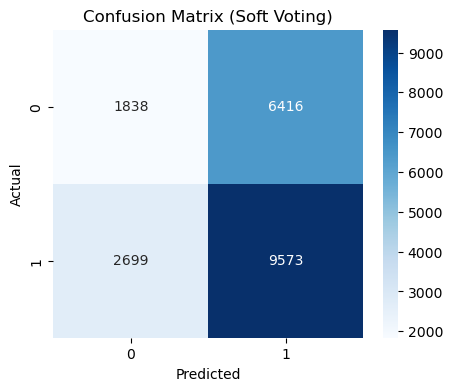

C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:38:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:42:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:43:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not

Soft Voting Cross-Validation Accuracy: 0.6115 ± 0.1139


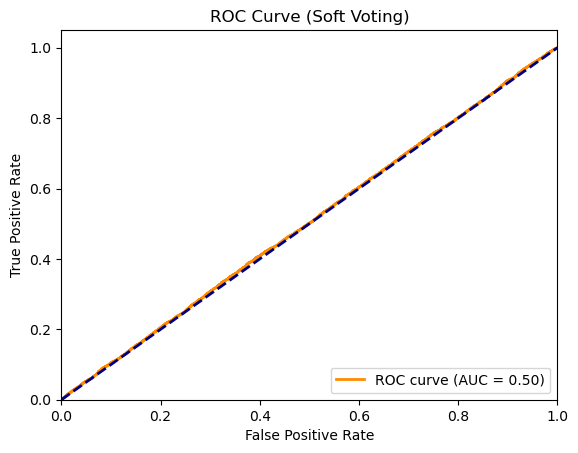

In [45]:

# Ensemble Methods Voting Classifier
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
ada = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=1, random_state=42), n_estimators=50, algorithm='SAMME', random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hard Voting
voting_hard = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('ada', ada)], voting='hard')
voting_hard.fit(X_train_res, y_train_res)
y_pred_hard = voting_hard.predict(X_test)
print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))
print(classification_report(y_test, y_pred_hard, zero_division=1))
cm = confusion_matrix(y_test, y_pred_hard)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Hard Voting)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Hard Voting Cross-Validation
cv_scores_hard = cross_val_score(voting_hard, X_train_res, y_train_res, cv=5, scoring='accuracy')
print(f"Hard Voting Cross-Validation Accuracy: {cv_scores_hard.mean():.4f} ± {cv_scores_hard.std():.4f}")

# Soft Voting

voting_soft = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('ada', ada)], voting='soft')
voting_soft.fit(X_train_res, y_train_res)
y_pred_soft = voting_soft.predict(X_test)
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))
print(classification_report(y_test, y_pred_soft, zero_division=1))
cm = confusion_matrix(y_test, y_pred_soft)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Soft Voting)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Soft Voting Cross-Validation
cv_scores_soft = cross_val_score(voting_soft, X_train_res, y_train_res, cv=5, scoring='accuracy')
print(f"Soft Voting Cross-Validation Accuracy: {cv_scores_soft.mean():.4f} ± {cv_scores_soft.std():.4f}")

# ROC Curve and AUC for Soft Voting
if hasattr(voting_soft, "predict_proba"):
    y_score = voting_soft.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Soft Voting)')
    plt.legend(loc="lower right")
    plt.show()

# Ensemble Methods Voting Classifier
Analysis:
- Both voting methods perform similarly, with Soft Voting slightly ahead in test and CV accuracy.
- Both methods favor class 1 (higher recall and F1), but struggle with class 0 (low recall and F1).
- Soft Voting is marginally better overall.
  

C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SANDY EZZAT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SANDY EZZAT\a

                  Model  Accuracy  Precision    Recall  F1-score
0      Bagging (LogReg)  0.597876   0.357456  0.597876  0.447413
1       Boosting (Tree)  0.597827   0.552504  0.597827  0.448796
2  Stacking (LR+KNN+NB)  0.597876   0.357456  0.597876  0.447413
3    Voting (LR+KNN+NB)  0.597876   0.357456  0.597876  0.447413


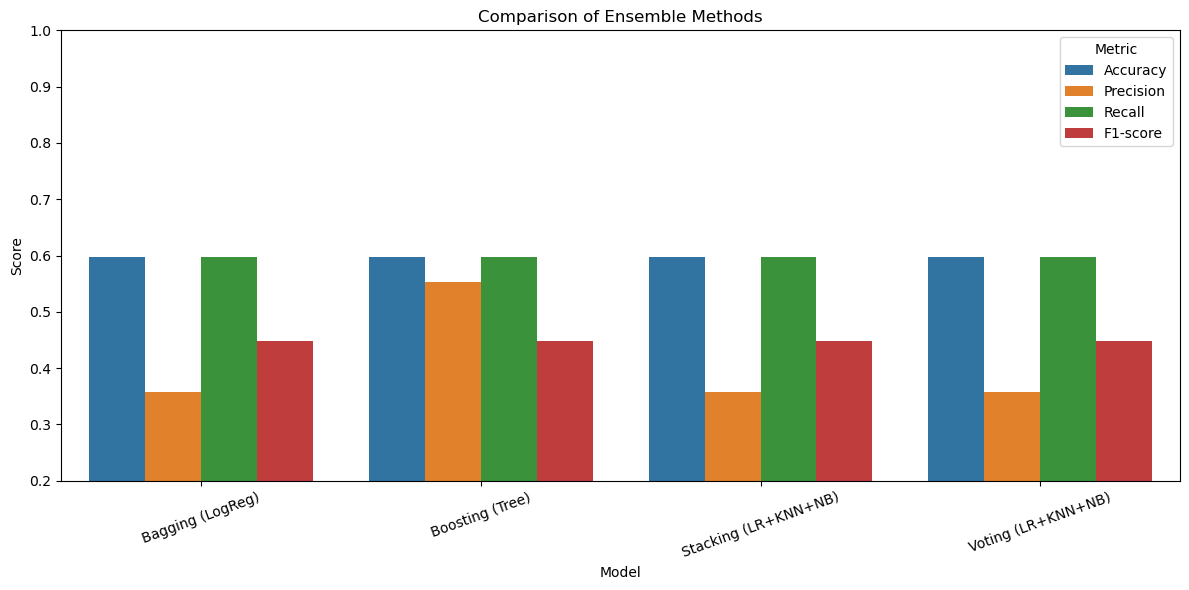

In [223]:

# Define models
models = {
    "Bagging (LogReg)": BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42),
    "Boosting (Tree)": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=50, random_state=42),
    "Stacking (LR+KNN+NB)": StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('knn', KNeighborsClassifier()),
            ('nb', GaussianNB())
        ],
        final_estimator=LogisticRegression(),
        cv=5
    ),
    "Voting (LR+KNN+NB)": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('knn', KNeighborsClassifier()),
            ('nb', GaussianNB())
        ],
        voting='hard'
    )
}

# Collect metrics
summary = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-score": report['weighted avg']['f1-score']
    })

df_summary = pd.DataFrame(summary)
print(df_summary)

# Visual comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=df_summary.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric')
plt.title('Comparison of Ensemble Methods')
plt.xticks(rotation=20)
plt.ylim(0.2, 1)
plt.tight_layout()
plt.show()

                  Model  CV Accuracy    CV Std  Test Accuracy  Precision  \
0      Bagging (LogReg)     0.598872  0.000027       0.597876   0.357456   
1       Boosting (Tree)     0.598178  0.000947       0.597827   0.552504   
2  Stacking (LR+KNN+NB)     0.598872  0.000027       0.597876   0.357456   
3    Voting (LR+KNN+NB)     0.598872  0.000027       0.597876   0.357456   
4   Logistic Regression     0.598872  0.000027       0.597876   0.357456   
5                   KNN     0.537655  0.005405       0.537757   0.521809   
6               XGBoost     0.575462  0.004286       0.581312   0.527453   

     Recall  F1-score  
0  0.597876  0.447413  
1  0.597827  0.448796  
2  0.597876  0.447413  
3  0.597876  0.447413  
4  0.597876  0.447413  
5  0.537757  0.526286  
6  0.581312  0.499334  


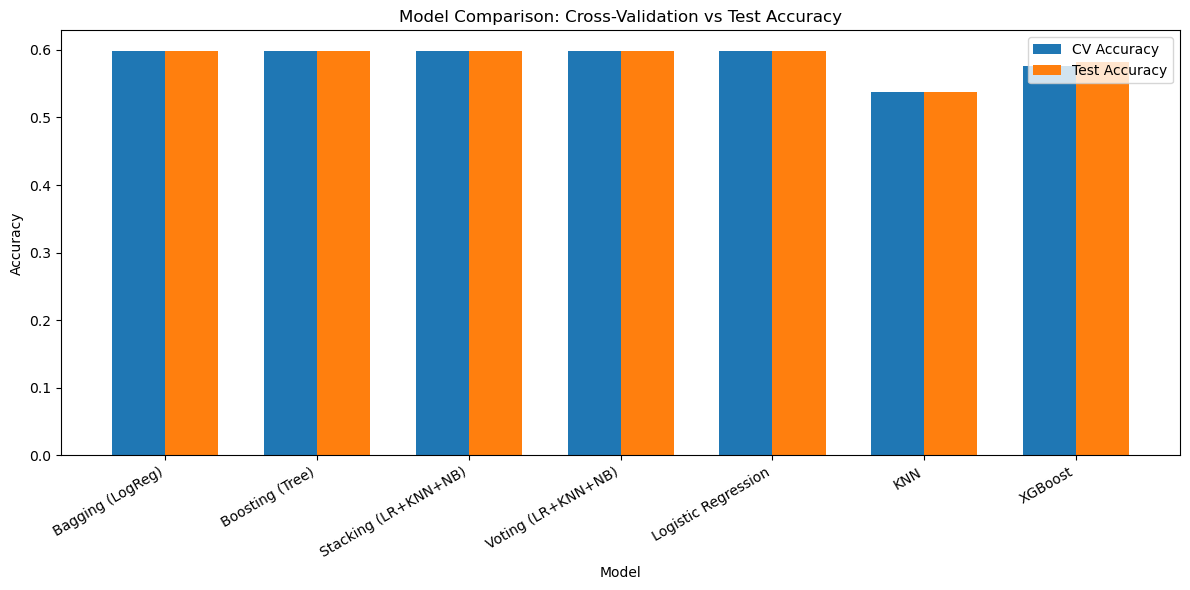

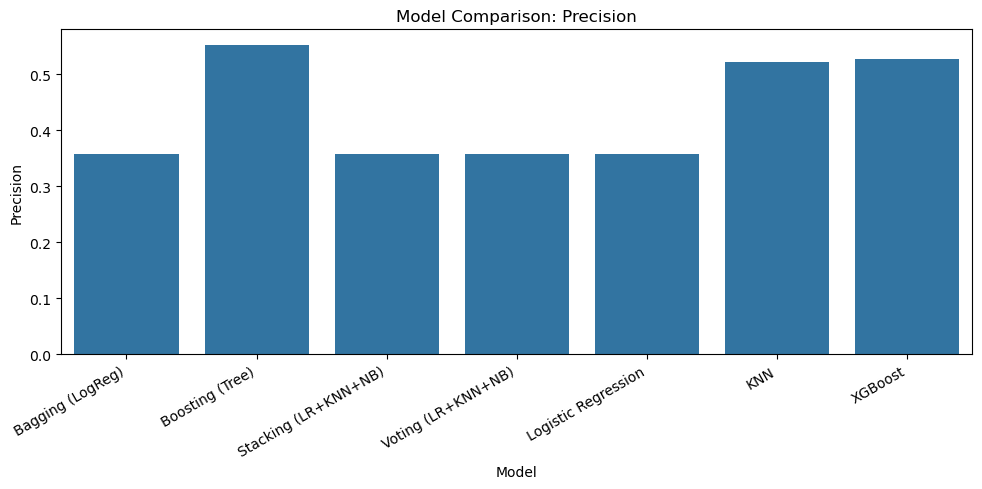

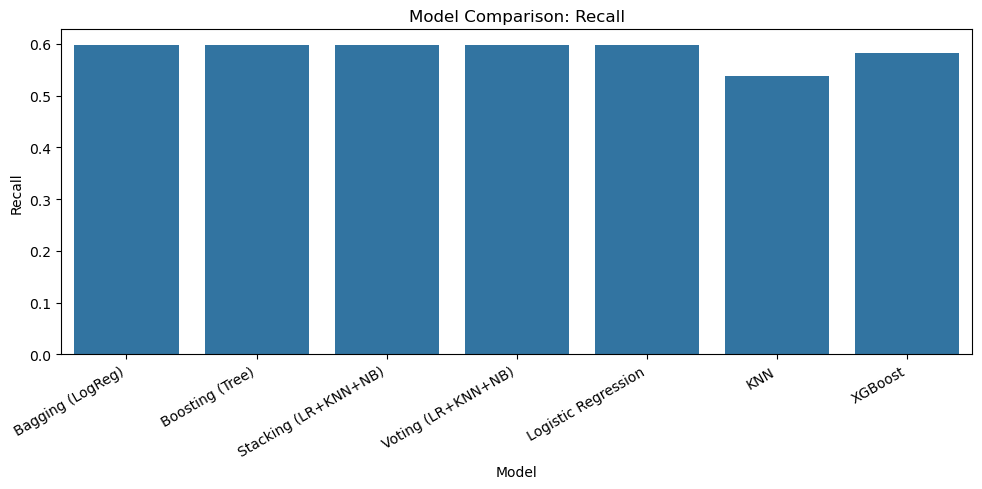

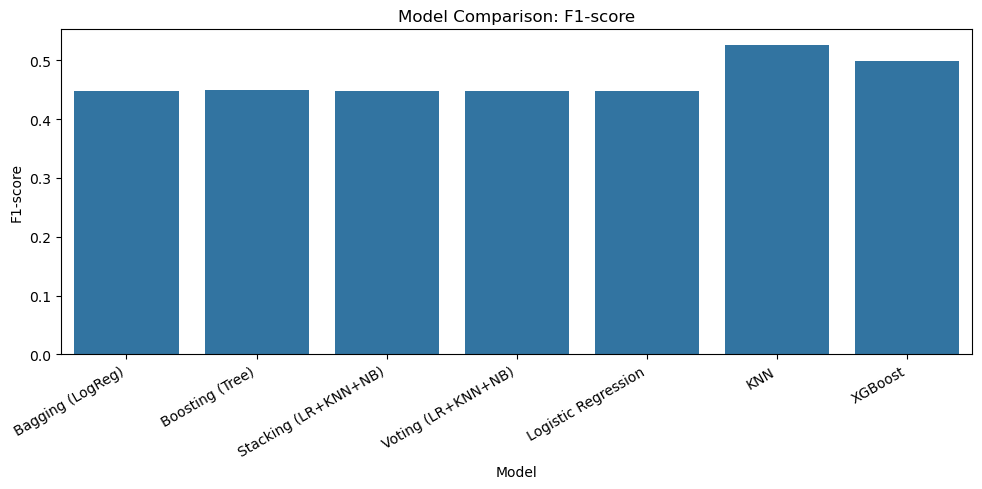

In [50]:

import matplotlib.pyplot as plt
import seaborn as sns

# Your existing summary code
cv_df_summary = pd.DataFrame(summary)
print(cv_df_summary)

# Visual comparison: Barplot for CV Accuracy and Test Accuracy
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(cv_df_summary))

plt.bar(index, cv_df_summary['CV Accuracy'], bar_width, label='CV Accuracy')
plt.bar([i + bar_width for i in index], cv_df_summary['Test Accuracy'], bar_width, label='Test Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Cross-Validation vs Test Accuracy')
plt.xticks([i + bar_width / 2 for i in index], cv_df_summary['Model'], rotation=30, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Visualize other metrics (Precision, Recall, F1-score)
metrics = ['Precision', 'Recall', 'F1-score']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Model', y=metric, data=cv_df_summary)
    plt.title(f'Model Comparison: {metric}')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()


*Boosting (Tree) has the highest precision (0.5525)(fewer false positives) and a competitive F1-score (0.4488) among the top models, while its accuracy is nearly identical to the others. However, all ensemble models except KNN and XGBoost have almost the same accuracy, recall, and F1-score, suggesting similar performance.*
